In [1]:
# 讀客服資料檔案(原本要做的)
import pandas as pd
df = pd.read_excel('data.xlsx')

# 將客服資料存成文本
import re
Data = ''
for i in range(999):
    s = df.at[i,'Contents']
    s = s.replace('[ECP]','')
    s = re.sub("[+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）:-]+".encode('utf-8').decode('utf-8'), "".encode('utf-8').decode('utf-8'),s)
    s = ''.join(i for i in s if not i.isdigit())
    Data = Data + s

In [2]:
# 讀新聞檔案 refer to : https://github.com/MiccWan/Political-News-Analysis
news = pd.read_excel('news_data.xlsx',encoding='utf-8')

news_data = []    # 存新聞array
News_Data = ''    # 存成文本

for i in range(500):
    s = str(news.at[i,'Contents'])
    s = re.sub("[+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）:-]+".encode('utf-8').decode('utf-8'), "".encode('utf-8').decode('utf-8'),s)
    cop = re.compile("[^\u4e00-\u9fa5^.^0-9^' ']")
    s = cop.sub("", s)
    News_Data = News_Data + s
    news_data.append(s)

In [3]:
from langconv import *
# 繁體轉簡體
# refer to : https://raw.githubusercontent.com/skydark/nstools/master/zhtools/langconv.py 
# & https://raw.githubusercontent.com/skydark/nstools/master/zhtools/zh_wiki.py

def Traditional2Simplified(sentence):
    '''
    将sentence中的繁体字转为简体字
    :param sentence: 待转换的句子
    :return: 将句子中繁体字转换为简体字之后的句子
    '''
    sentence = Converter('zh-hans').convert(sentence)
    return sentence


In [4]:
# 簡體化 News_Data
# 這樣就能放入本課介紹的NER程式裡篩選

simplified_News_Data = Traditional2Simplified(News_Data)
print(simplified_News_Data[:500])

针对北农总经理吴音宁日前遭议员爆料用业务推广费买洋酒送民进党台北市党部一事台北市长柯文哲日前派监察人政风处突袭北农查帐农委会副主委陈吉仲昨6质疑市政府会同相关政风其他市政府单位配合监察人去查帐有没有符合所谓的公司的治理对此政风处今发布声明强调秉持依法行政公正公允立场配合协助监察人厘清事实的立场才偕同出席陈吉仲昨指出北农是一家公司现在有3个监察人包括农委会北市府民间团体各一个监察人本来就该扮演监察人的角色可是当市政府会同它相关政风其他市政府单位配合监察人去的时候这时候有没有符合所谓的公司的治理这个台北市政府可能可以去思考看看政风处发布声明表示北农案备受各界瞩目为尽速了解并厘清事实真相柯市长于日前指示北市府监察人及相关监督机关进行了解并责由政风处协助配合为充分达成监督行政适法作为的职责回应议会于总质询要求应监督官派董监事公允行事依循市长于议会答复回应的指示由北市府监察人主查北农之帐目政风处则配合协助监察人厘清事实之立场偕同出席并确保官股董监事公务员能秉持公平公正立场进行调查政风处强调秉持依法行政以公正公允之立场实现北市府正直诚信之核心价值同时并以爱护保护防护同仁的作法作好兴利除弊而配合依法


In [5]:
# 用jieba來斷詞並取出關鍵字 refer to : https://github.com/MiccWan/Political-News-Analysis
import jieba
import jieba.analyse
import numpy as np

jieba.set_dictionary('dict.txt.big')
jieba.load_userdict('userdict.txt')
jieba.analyse.set_stop_words('stop_words.txt')
tags = jieba.analyse.extract_tags(News_Data,100)
Terms = np.asarray(tags)
Terms
#print(",".join(tags))

Building prefix dict from C:\Users\lawliet\Desktop\HW2\dict.txt.big ...
Loading model from cache C:\Users\lawliet\AppData\Local\Temp\jieba.uec1c11791679c6c48b765810df04bb51.cache
Loading model cost 2.425 seconds.
Prefix dict has been built succesfully.


array(['台灣', '民進黨', '市長', '侯友宜', '國民黨', '柯文哲', '總統', '中國', '選舉', '蘇貞昌',
       '立委', '參選人', '媒體', '美國', '台北', '蔡英文', '國家', '議員', '姚文智', '市府',
       '縣長', '新北市', '發展', '吳音寧', '新北', '活動', '競選', '社會', '北農', '陳其邁',
       '參選', '候選人', '政府', '質疑', '兩岸', '宿舍', '爭議', '軍人', '關係', '立法院', '參加',
       '民眾', '文大', '國際', '推動', '學生', '文化大學', '民調', '秘書長', '政治', '協商',
       '記者會', '影響', '丁守中', '召開', '持續', '黨團', '陳菊', '總統府', '面對', '官員',
       '支持', '討論', '提名', '受訪', '提供', '回應', '主委', '產業', '出席', '臉書', '舉辦',
       '團隊', '市民', '正義', '協助', '計畫', '經濟', '台南', '繼續', '建設', '歷史', '時代力量',
       '高雄', '舉行', '議題', '價值', '解決', '大陸', '調查', '林為洲', '委員', '總經理', '呼籲',
       '政黨', '委員會', '團體', '捷運', '期間', '馬英九'], dtype='<U4')

In [6]:
# 建立TermDocumentMatrix
def TermDocumentMatrix(doc,terms):
    term_freq = {}
    for t in terms:           
        if not (t in term_freq.keys()):
            term_freq[t] = 0
        term_freq[t] += doc.count(t)
        
    return term_freq


TDM = []
for i in range(len(news_data)):
    TDM.append(TermDocumentMatrix(news_data[i],Terms))

df = pd.DataFrame(data=TDM)   
df.head(20)

,丁守中,中國,主委,侯友宜,候選人,價值,兩岸,出席,北農,協助,...,質疑,軍人,選舉,關係,陳其邁,陳菊,面對,馬英九,高雄,黨團
0,0,0,1,0,0,1,0,2,5,3,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,7,0,...,0,0,0,1,0,0,3,0,0,0
3,0,5,0,0,0,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,0,1,1,0,0,0,3,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,15,0,0,0,0,0,0,...,0,0,4,1,0,0,0,0,0,0
9,0,4,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# 計算共現矩陣
TDM_array = df.values

CoOccMatrix = np.dot(TDM_array.T, TDM_array)

CoOcc_df = pd.DataFrame(data=CoOccMatrix,columns=df.columns.values, index=df.columns.values)
CoOcc_df.head(20)

,丁守中,中國,主委,侯友宜,候選人,價值,兩岸,出席,北農,協助,...,質疑,軍人,選舉,關係,陳其邁,陳菊,面對,馬英九,高雄,黨團
丁守中,767,40,63,39,53,0,113,70,25,22,...,43,0,101,1,0,7,26,124,2,0
中國,40,6081,56,10,72,238,631,142,12,30,...,59,35,205,606,6,29,143,48,26,22
主委,63,56,430,46,38,10,137,37,39,14,...,25,40,125,33,36,39,21,45,16,36
侯友宜,39,10,46,4771,231,27,0,178,16,37,...,497,0,851,52,0,4,243,31,16,24
候選人,53,72,38,231,459,39,7,68,2,17,...,65,14,247,15,9,54,36,6,35,12
價值,0,238,10,27,39,320,39,41,9,24,...,31,16,116,69,28,21,16,6,19,16
兩岸,113,631,137,0,7,39,1006,15,0,18,...,47,52,84,291,0,16,89,94,5,73
出席,70,142,37,178,68,41,15,323,68,26,...,52,13,97,96,188,94,22,55,137,14
北農,25,12,39,16,2,9,0,68,1404,26,...,89,0,82,49,0,14,63,28,66,3
協助,22,30,14,37,17,24,18,26,26,217,...,4,28,42,27,52,18,24,2,81,11


In [8]:
from numpy.linalg import inv
D = np.diag(np.diag(CoOcc_df.values))
sqrt_D = np.sqrt(D)

coocomatrix = np.dot(np.dot(inv(sqrt_D),CoOccMatrix),inv(sqrt_D))    # sqrt_D^-1 * C * sqrt_D^-1 對角單位化

coocc_df = pd.DataFrame(data=coocomatrix,columns=df.columns.values, index=df.columns.values)
coocc_df.head(20)

,丁守中,中國,主委,侯友宜,候選人,價值,兩岸,出席,北農,協助,...,質疑,軍人,選舉,關係,陳其邁,陳菊,面對,馬英九,高雄,黨團
丁守中,1.000000,0.018521,0.109701,0.020387,0.089325,0.000000,0.128642,0.140637,0.024091,0.053926,...,0.096106,0.000000,0.087705,0.001271,0.000000,0.011684,0.060600,0.232141,0.001841,0.000000
中國,0.018521,1.000000,0.034631,0.001857,0.043096,0.170614,0.255119,0.101321,0.004107,0.026116,...,0.046832,0.015314,0.063222,0.273557,0.001701,0.017190,0.118370,0.031914,0.008502,0.005592
主委,0.109701,0.034631,1.000000,0.032116,0.085535,0.026958,0.208299,0.099281,0.050193,0.045831,...,0.074625,0.065816,0.144970,0.056020,0.038372,0.086938,0.065370,0.112514,0.019675,0.034413
侯友宜,0.020387,0.001857,0.032116,1.000000,0.156099,0.021852,0.000000,0.143388,0.006182,0.036364,...,0.445381,0.000000,0.296297,0.026501,0.000000,0.002677,0.227089,0.023269,0.005907,0.006888
候選人,0.089325,0.043096,0.085535,0.156099,1.000000,0.101761,0.010301,0.176604,0.002491,0.053866,...,0.187796,0.022296,0.277264,0.024646,0.009285,0.116510,0.108465,0.014520,0.041657,0.011103
價值,0.000000,0.170614,0.026958,0.021852,0.101761,1.000000,0.068737,0.127529,0.013427,0.091077,...,0.107267,0.030517,0.155950,0.135780,0.034596,0.054265,0.057735,0.017390,0.027083,0.017730
兩岸,0.128642,0.255119,0.208299,0.000000,0.010301,0.068737,1.000000,0.026314,0.000000,0.038525,...,0.091723,0.055938,0.063692,0.322966,0.000000,0.023318,0.181128,0.153659,0.004020,0.045623
出席,0.140637,0.101321,0.099281,0.143388,0.176604,0.127529,0.026314,1.000000,0.100977,0.098207,...,0.179094,0.024680,0.129799,0.188033,0.231205,0.241771,0.079016,0.158668,0.194375,0.015441
北農,0.024091,0.004107,0.050193,0.006182,0.002491,0.013427,0.000000,0.100977,1.000000,0.047104,...,0.147023,0.000000,0.052630,0.046034,0.000000,0.017271,0.108530,0.038744,0.044914,0.001587
協助,0.053926,0.026116,0.045831,0.036364,0.053866,0.091077,0.038525,0.098207,0.047104,1.000000,...,0.016808,0.064853,0.068568,0.064520,0.078022,0.056483,0.105166,0.007039,0.140209,0.014802


In [9]:
coocc_df.to_csv('co-occurancy_matrix.csv',index=False)


In [10]:
CoOcc_df.columns

Index(['丁守中', '中國', '主委', '侯友宜', '候選人', '價值', '兩岸', '出席', '北農', '協助', '協商',
       '參加', '參選', '參選人', '受訪', '召開', '台北', '台南', '台灣', '吳音寧', '呼籲', '回應',
       '國家', '國民黨', '國際', '團隊', '團體', '大陸', '委員', '委員會', '姚文智', '媒體', '學生',
       '官員', '宿舍', '市府', '市民', '市長', '建設', '影響', '持續', '捷運', '推動', '提供', '提名',
       '支持', '政府', '政治', '政黨', '文化大學', '文大', '新北', '新北市', '時代力量', '期間', '林為洲',
       '柯文哲', '正義', '歷史', '民眾', '民調', '民進黨', '活動', '爭議', '產業', '發展', '社會',
       '秘書長', '立委', '立法院', '競選', '經濟', '縣長', '總統', '總統府', '總經理', '繼續', '美國',
       '臉書', '舉行', '舉辦', '蔡英文', '蘇貞昌', '解決', '計畫', '討論', '記者會', '調查', '議員',
       '議題', '質疑', '軍人', '選舉', '關係', '陳其邁', '陳菊', '面對', '馬英九', '高雄', '黨團'],
      dtype='object')

C:\Users\lawliet\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


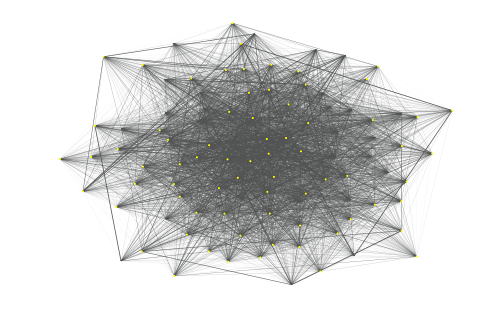

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import _rebuild
# refer to : https://github.com/joe0123/Fintech-Text_Mining_and_Machine_Learning/tree/master/HW2

_rebuild()
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
#reference: https://blog.csdn.net/helunqu2017/article/details/78602959


df = pd.read_csv("co-occurancy_matrix.csv")
co_matrix = coocc_df.values
nm_list = CoOcc_df.columns
freq_list = np.diag(coocc_df.values)

G = nx.Graph()
for i in range(len(co_matrix)):
    if freq_list[i] != 0:
        G.add_node(str(nm_list[i]), size = int(freq_list[i]))

for i in range(len(co_matrix)):
    for j in range(len(co_matrix)):
        if (i != j) and (co_matrix[i][j] != 0.0):
            G.add_edge(str(nm_list[i]), str(nm_list[j]), weight = co_matrix[i][j])

pos = nx.spring_layout(G, k = 0.5, iterations = 15)
nx.draw(G, pos, with_labels=False, node_size = [u[1]['size']  for u in G.nodes.data()],
        width = [G[u][v]['weight'] for u, v in G.edges()], edge_color = '#525454', node_color = '#FFFF00')
plt.show()